In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv("takehome_users.csv", encoding='latin-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')

user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
user_engagement['time_stamp'] =  pd.to_datetime(user_engagement['time_stamp'])


df = user_engagement.set_index('time_stamp')
df

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
...,...,...
2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,11998,1


## Adopted Users

In [5]:
newdf = df.groupby([pd.Grouper(freq='W'), 'user_id'])['visited'].count()
df2 = pd.DataFrame(newdf)

dffiltered = df2[df2['visited'] >= 3]

dffiltered

visited
time_stamp user_id         
2012-06-10 1693           3
2012-06-17 728            4
           11764          3
2012-06-24 1693           3
           5297           3
...                     ...
2014-06-08 11573          3
           11688          3
           11806          3
           11895          3
           11924          3

[33859 rows x 1 columns]

In [6]:
dffiltered = dffiltered.reset_index()


dffiltered

,time_stamp,user_id,visited
0,2012-06-10,1693,3
1,2012-06-17,728,4
2,2012-06-17,11764,3
3,2012-06-24,1693,3
4,2012-06-24,5297,3
...,...,...,...
33854,2014-06-08,11573,3
33855,2014-06-08,11688,3
33856,2014-06-08,11806,3
33857,2014-06-08,11895,3


In [7]:
adoptedusers = dffiltered[['user_id']]
dffiltered = adoptedusers.rename(columns={'user_id': 'object_id'})
adoptedusers = dffiltered[['object_id']].drop_duplicates()
adoptedusers['Adopted_User'] = 1

## Merge with Master

In [8]:
len(users)

12000

In [9]:
mergeddf = users.merge(adoptedusers, on='object_id', how='left')
mergeddf.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_User
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN


In [10]:
mergeddf['Adopted_User'] = mergeddf['Adopted_User'].replace(np.nan, 0)
mergeddf.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_User
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [11]:
df = pd.get_dummies(mergeddf, columns=['creation_source'])

nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
invited_by_user_id,0.46525
last_session_creation_time,0.26475


In [12]:
def invited_by(x):
    if x > 0:
        return 1
    else:
        return 0
    
    
df['invitedby'] = df['invited_by_user_id'].apply(invited_by)

df['invitedby'].value_counts()

1    6417
0    5583
Name: invitedby, dtype: int64

In [13]:
del df['invited_by_user_id']

df.head()

nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
last_session_creation_time,0.26475


In [14]:
df['last_session_creation_time'] = df['last_session_creation_time'].fillna(0)
df.head()

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,Adopted_User,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,invitedby
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,0.0,1,0,0,0,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,1.0,0,1,0,0,0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,0.0,0,1,0,0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,0.0,1,0,0,0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,0.0,1,0,0,0,0,1


## Factors Most Correlated with Users

In [15]:
corr = df.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')


,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,Adopted_User,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,invitedby
object_id,1.000000,0.010000,-0.030000,-0.020000,0.000000,0.010000,-0.010000,-0.000000,-0.000000,0.000000,0.020000,-0.010000
last_session_creation_time,0.010000,1.000000,0.010000,0.010000,0.010000,0.230000,-0.000000,0.020000,-0.390000,0.180000,0.220000,0.020000
opted_in_to_mailing_list,-0.030000,0.010000,1.000000,0.480000,0.000000,0.010000,0.000000,0.010000,-0.010000,0.000000,-0.000000,0.010000
enabled_for_marketing_drip,-0.020000,0.010000,0.480000,1.000000,0.010000,0.010000,-0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000
org_id,0.000000,0.010000,0.000000,0.010000,1.000000,0.060000,-0.000000,-0.020000,0.010000,0.020000,-0.000000,-0.020000
Adopted_User,0.010000,0.230000,0.010000,0.010000,0.060000,1.000000,0.040000,-0.010000,-0.070000,0.020000,0.030000,0.020000
creation_source_GUEST_INVITE,-0.010000,-0.000000,0.000000,-0.000000,-0.000000,0.040000,1.000000,-0.350000,-0.220000,-0.220000,-0.170000,0.440000
creation_source_ORG_INVITE,-0.000000,0.020000,0.010000,0.000000,-0.020000,-0.010000,-0.350000,1.000000,-0.340000,-0.340000,-0.270000,0.690000
creation_source_PERSONAL_PROJECTS,-0.000000,-0.390000,-0.010000,-0.010000,0.010000,-0.070000,-0.220000,-0.340000,1.000000,-0.210000,-0.170000,-0.500000
creation_source_SIGNUP,0.000000,0.180000,0.000000,0.000000,0.020000,0.020000,-0.220000,-0.340000,-0.210000,1.000000,-0.170000,-0.490000


## Random Forest Model

In [16]:
df.columns

Index(['object_id', 'creation_time', 'name', 'email',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'Adopted_User',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'invitedby'],
      dtype='object')

In [17]:
y = df[['Adopted_User']]
X = df[['last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'invitedby']]

X.dtypes

last_session_creation_time            float64
opted_in_to_mailing_list                int64
enabled_for_marketing_drip              int64
creation_source_GUEST_INVITE            uint8
creation_source_ORG_INVITE              uint8
creation_source_PERSONAL_PROJECTS       uint8
creation_source_SIGNUP                  uint8
creation_source_SIGNUP_GOOGLE_AUTH      uint8
invitedby                               int64
dtype: object

C:\Users\ashle\Anaconda3\envs\sb\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


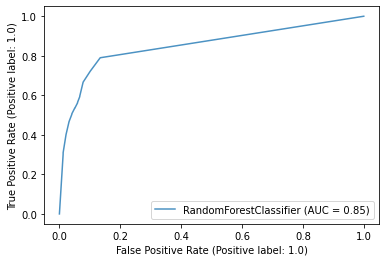

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y,random_state=5)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve


rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(Xlr, ylr)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, Xtestlr, ytestlr, ax=ax, alpha=0.8)
plt.show()

In [19]:
print(accuracy_score(rfc.predict(Xtestlr), ytestlr))

0.8966666666666666


## Conclusion

Based upon the model above, the random forest model is a good predictor of performance with an AUC of .85 and accuracy of .90